In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [27]:
df = pd.read_csv("homeprices.csv")
df

,area,prices
0,2600,550000
1,2800,670000
2,3000,760000
3,3500,800000
4,4000,850000


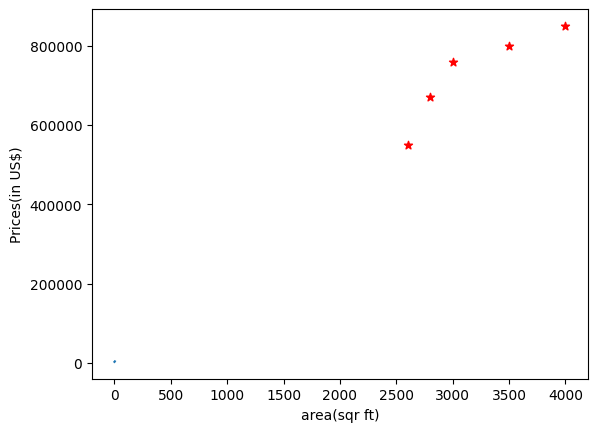

In [28]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("Prices(in US$)")
plt.scatter(df.area, df.prices, color="red", marker='*')
plt.plot(df.area, )

In [29]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.prices)


LinearRegression()

In [57]:
reg.predict([[10000]]) #linear regression model #it gives predicted price

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2010574.53416149])

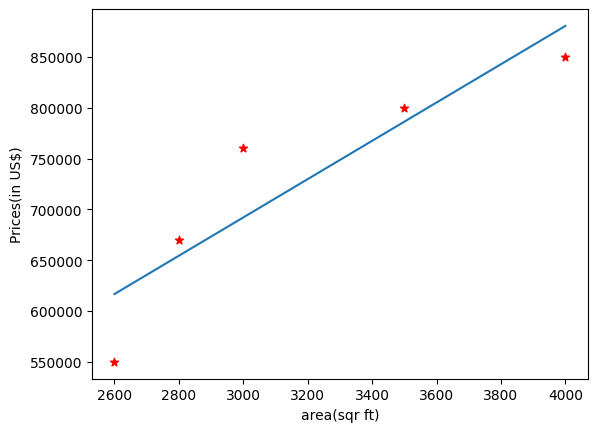

In [31]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("Prices(in US$)")
plt.scatter(df.area, df.prices, color="red", marker='*')
plt.plot(df.area, reg.predict(df[['area']]))

In [32]:
reg.predict([[3500]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([786273.29192547])

In [33]:
reg.coef_

array([188.35403727])

In [34]:
reg.intercept_

np.float64(127034.16149068333)

In [35]:
188.35403727*2500+127034.16149068333

597919.2546656833

In [36]:
d = pd.read_csv("areas.csv")
d

,area
0,5000
1,1400
2,2500
3,5000
4,3300
5,3800
6,4500
7,4800
8,4900
9,5900


In [37]:
d.head()

,area
0,5000
1,1400
2,2500
3,5000
4,3300


In [38]:
p = reg.predict(d)

In [39]:
d['prices'] = p

In [40]:
d

,area,prices
0,5000,1.068804e+06
1,1400,3.907298e+05
2,2500,5.979193e+05
3,5000,1.068804e+06
4,3300,7.486025e+05
5,3800,8.427795e+05
6,4500,9.746273e+05
7,4800,1.031134e+06
8,4900,1.049969e+06
9,5900,1.238323e+06


In [41]:
d.to_csv("predicted.csv",index=False)

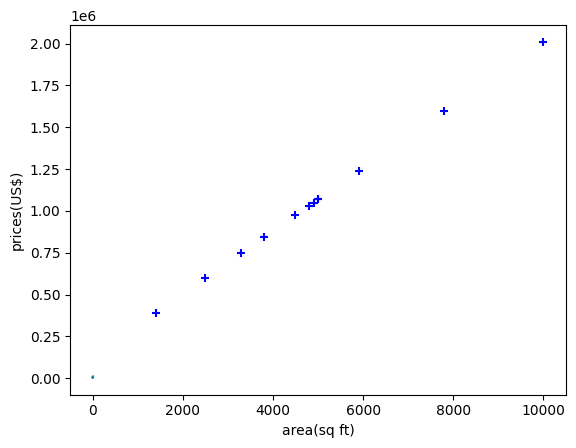

In [42]:
%matplotlib inline
plt.xlabel("area(sq ft)")
plt.ylabel("prices(US$)")
plt.scatter(d.area, d.prices, color="blue", marker='+')
plt.plot(d.area, )

In [43]:
model = linear_model.LinearRegression()
model.fit(d[['area']],d.prices)

LinearRegression()

In [44]:
model.predict([[3500]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([786273.29192547])

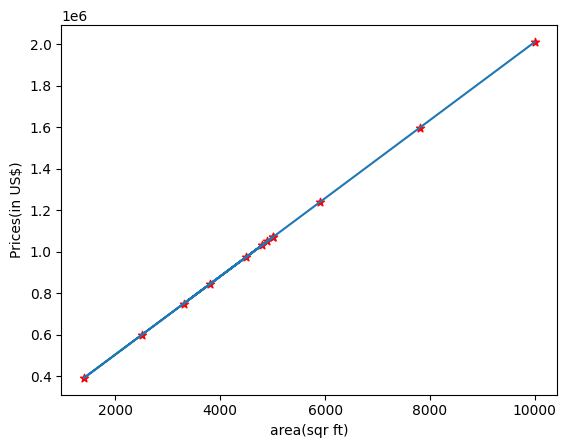

In [45]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("Prices(in US$)")
plt.scatter(d.area, d.prices, color="red", marker='*')
plt.plot(d.area, reg.predict(d[['area']]))

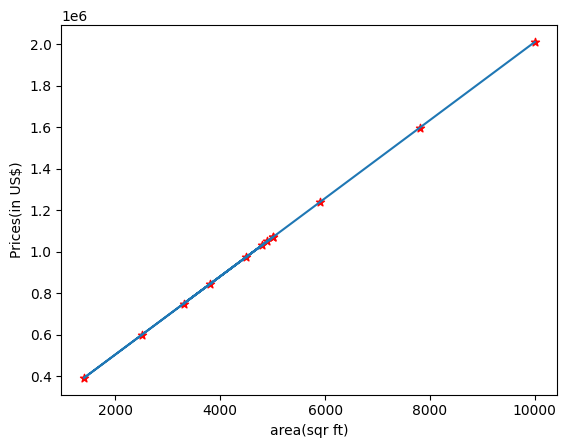

In [46]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("Prices(in US$)")
plt.scatter(d.area, d.prices, color="red", marker='*')
plt.plot(d.area, model.predict(d[['area']]))

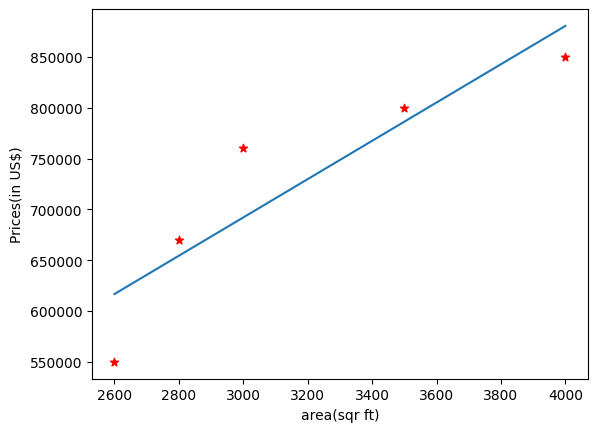

In [47]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("Prices(in US$)")
plt.scatter(df.area, df.prices, color="red", marker='*')
plt.plot(df.area, model.predict(df[['area']]))

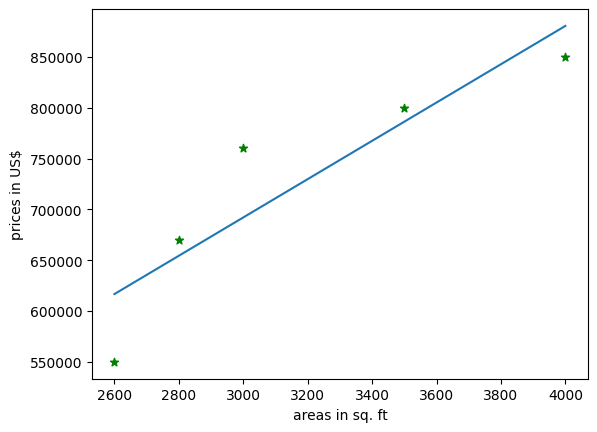

In [48]:
%matplotlib inline
plt.xlabel("areas in sq. ft")
plt.ylabel("prices in US$")
plt.scatter(df.area, df.prices, color="green",marker="*")
plt.plot(df.area, reg.predict(df[['area']]))

In [49]:
import pickle 


In [50]:
with open('model_pickle','wb') as f:
    pickle.dump(reg, f)

In [51]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [52]:
mp.predict([[5000]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1068804.34782609])

In [53]:
with open('model2_pickle','wb') as f:
    pickle.dump(model,f)

In [54]:
with open('model2_pickle','rb') as f:
    mc = pickle.load(f)

In [37]:
mc.predict([[3500]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([786273.29192547])

In [38]:
model.predict([[3500]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([786273.29192547])

In [40]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
%pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /home/lucky/.local/lib/python3.10/site-packages
Requires: 
Required-by: scikit-learn
Note: you may need to restart the kernel to use updated packages.


In [42]:
import joblib

In [43]:
joblib.dump(model,'model_joblib')


['model_joblib']

In [44]:
mj = joblib.load('model_joblib')

In [45]:
mj.predict([[5000]])

/home/lucky/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1068804.34782609])

In [46]:
mj.coef_, mj.intercept_, mc.coef_, mc.intercept_

(array([188.35403727]),
 np.float64(127034.1614906831),
 array([188.35403727]),
 np.float64(127034.1614906831))

In [ ]:
# gfg ques
# def doOverlap(L1, R1, L2, R2):
#     # If one rectangle is to the left of the other
#     if R1[0] < L2[0] or R2[0] < L1[0]:
#         return False

#     # If one rectangle is above the other
#     if L1[1] < R2[1] or L2[1] < R1[1]:
#         return False

#     return True
    

# L1 = (0, 10)
# R1 = (10, 0)
# L2 = (5, 5)
# R2 = (15, 0)

# doOverlap(L1,R1,L2,R2)  # Output: True

True